# Rooms classification - Fastai download from google images

In [1]:
from fastai.vision import *

### Find sampla images

1. Search for google images
2. Scroll down (realy down)
3. Run in javascript console (<kbd>Cmd</kbd><kbd>Opt</kbd><kbd>k</kbd>):

```javascript
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

### Create directories and download files

Choose an appropriate name for your labeled images. You can run these steps multiple times to create different labels.

In [2]:
path = Path('images/rooms')
cats = ['living_room', 'kitchen', 'bathroom', 'bedroom']

In [8]:
files = [c+".csv" for c in cats]
dests = [path/cat for cat in cats]
for dest in dests:
    dest.mkdir(parents=True, exist_ok=True)

## Download images

In [12]:
for c in cats:
    download_images(path/c+".csv", path/c, max_pics=300)
    verify_images(path/c, delete=True, max_size=600)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

## View data

In [97]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=tfms, size=350, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [4]:
data.classes

['bathroom', 'bedroom', 'kitchen', 'living_room']

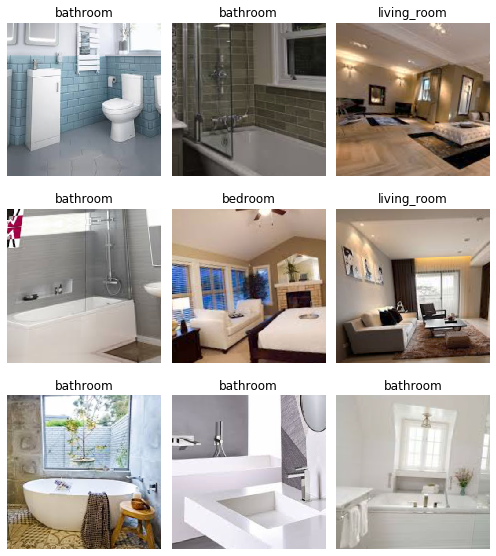

In [5]:
data.show_batch(rows=3, figsize=(7,8))

In [6]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['bathroom', 'bedroom', 'kitchen', 'living_room'], 4, 768, 192)

In [7]:
ind = data.train_ds[0][0]

___

#### Check ind view

In [50]:
import cv2
from sklearn.preprocessing import minmax_scale

In [74]:
im = cv2.imread('images/rooms/living_room/00000001.jpg')

In [85]:
def _logim(im):
    im = np.log1p(im)
    im = minmax_scale(im.ravel(), feature_range=(0,255)).reshape(im.shape)
    im = im.astype(int)
    return im

logim = TfmPixel(_logim)

In [76]:
im2 = logim(im)

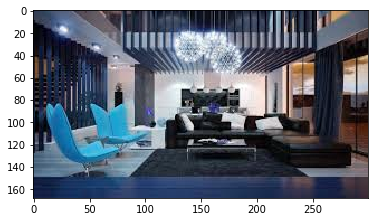

In [75]:
plt.imshow(im)

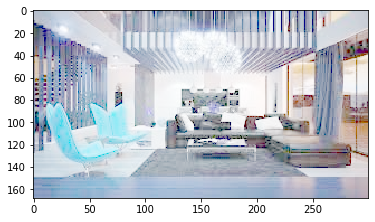

In [77]:
plt.imshow(im2)

In [81]:
def hist_arr(arr):
    farr = np.ndarray.flatten(arr)
    plt.hist(farr, bins=20)
    plt.axvline(farr.mean(), color='k', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(farr.mean()* 1.2, max_ylim*0.9, f"Mean: {farr.mean():.2f}; SD: {farr.std():.2f}")
    plt.show()

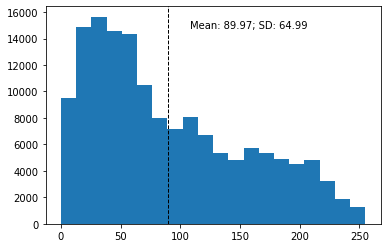

In [83]:
hist_arr(im[0:1000])

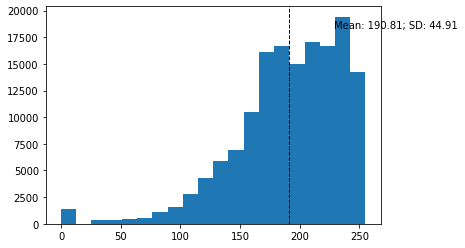

In [84]:
hist_arr(im2[0:1000])

___

## Train model

In [98]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate, accuracy])

In [63]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.713998,0.486362,0.218750,0.781250,00:17
1,1.180567,0.522349,0.151042,0.848958,00:17
2,0.902182,0.453321,0.151042,0.848958,00:17
3,0.727447,0.453133,0.145833,0.854167,00:17


In [77]:
[len(data.train_ds), data.train_ds[0][0].shape]

[768, torch.Size([3, 350, 350])]

In [90]:
a = np.ones([350, 350])
b = np.ones([7, 7])

In [91]:
np.dot(a, b)

ValueError: shapes (350,350) and (7,7) not aligned: 350 (dim 1) != 7 (dim 0)

In [93]:
7*50

350

In [84]:
learn.layer_groups

[Sequential(
   (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
   (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (2): ReLU(inplace=True)
   (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
   (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (6): ReLU(inplace=True)
   (7): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (9): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (11): ReLU(inplace=True)
   (12): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (13): BatchNorm2d(64, eps=1e-05, mom

In [95]:
(175*175)/64

478.515625

In [78]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 175, 175]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 175, 175]       128        True      
______________________________________________________________________
ReLU                 [64, 175, 175]       0          False     
______________________________________________________________________
MaxPool2d            [64, 88, 88]         0          False     
______________________________________________________________________
Conv2d               [64, 88, 88]         36,864     False     
______________________________________________________________________
BatchNorm2d          [64, 88, 88]         128        True      
______________________________________________________________________
ReLU                 [64, 88, 88]         0          False     
___________________________________________________

In [25]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


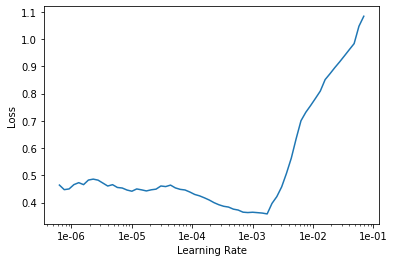

In [26]:
# If the plot is not showing try to give a start and end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [27]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.465727,0.283152,0.104167,00:10
1,0.383422,0.277679,0.104167,00:09


In [28]:
learn.save('stage-2')

## Interpretation

In [29]:
learn.load('stage-2');

In [30]:
interp = ClassificationInterpretation.from_learner(learn)

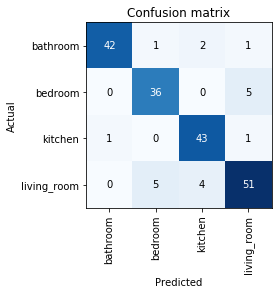

In [31]:
interp.plot_confusion_matrix()

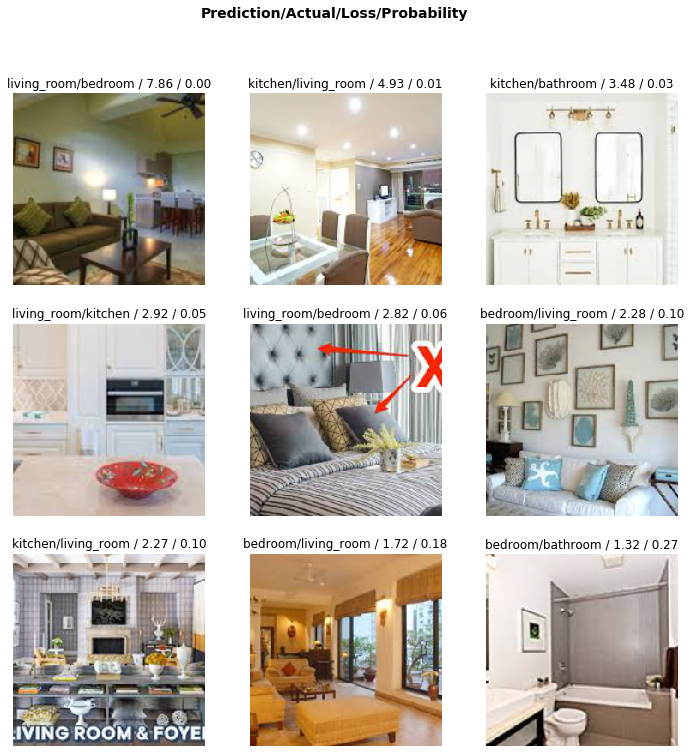

In [34]:
interp.plot_top_losses(9)

_____

#### Vanilla mini CNN in Pytorch